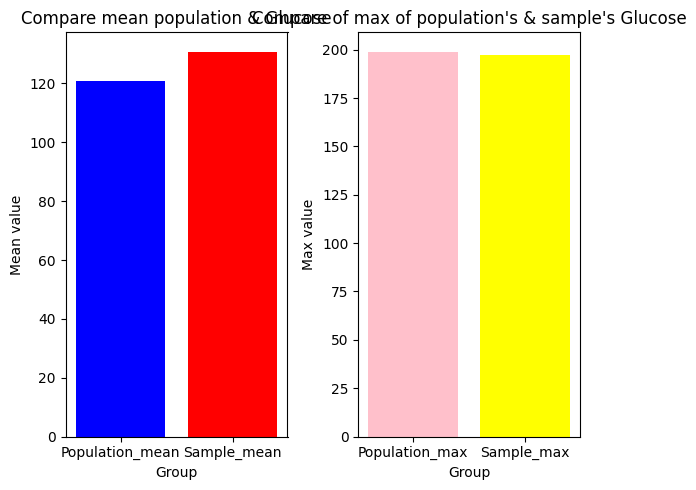

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cleaned dataset
data = pd.read_csv("diabetes.csv")

# Setting seed to 5432
np.random.seed(5432)

# Sample 25 observations from the population
sample_data = data.head(25)

# Calculating  mean of Glucose
sample_mean = sample_data['Glucose'].mean()

# Calculating  max of Glucose
sample_max = sample_data['Glucose'].max()

# Calculating population mean of Glucose
pop_mean = data['Glucose'].mean()

# Calculating population max of Glucose
pop_max = data['Glucose'].max()

# Creating lists for mean and max comparisons
mean_compare = {'Population_mean': pop_mean, 'Sample_mean': sample_mean}
max_compare = {'Population_max': pop_max, 'Sample_max': sample_max}

# Plotting bar charts for mean between population and sample
plt.figure(figsize=(6, 5))

plt.subplot(1, 2, 1)
plt.bar(mean_compare.keys(), mean_compare.values(), color=['blue', 'Red'])
plt.title("Compare mean population & Glucose")
plt.xlabel("Group")
plt.ylabel("Mean value")

# Plotting bar charts for max between population and sample
plt.subplot(1, 2, 2)
plt.bar(max_compare.keys(), max_compare.values(), color=['pink', 'yellow'])
plt.title("Compare of max of population's & sample's Glucose")
plt.xlabel("Group")
plt.ylabel("Max value")

plt.tight_layout()
plt.show()


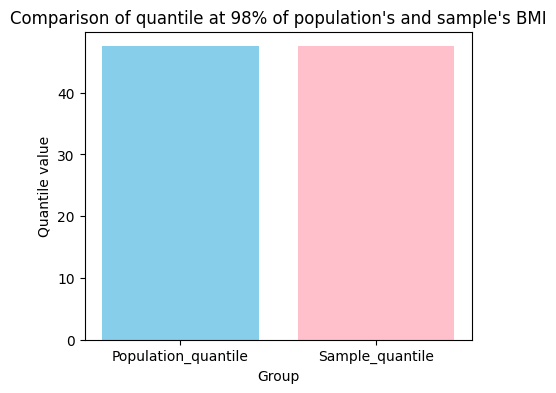

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Select 98th percentile BMI
sample_quantile = np.quantile(data['BMI'], 0.98)

# Calculate 98th percentile of BMI for population
pop_quantile = np.quantile(data['BMI'], 0.98)

# Create dictionary for population and sample quantiles
quan_compare = {'Population_quantile': pop_quantile, 'Sample_quantile': sample_quantile}

# Plotting bar chart
plt.figure(figsize=(5, 4))
plt.bar(quan_compare.keys(), quan_compare.values(), color=['skyblue', 'pink'])
plt.title("Comparison of quantile at 98% of population's and sample's BMI")
plt.xlabel("Group")
plt.ylabel("Quantile value")
plt.show()


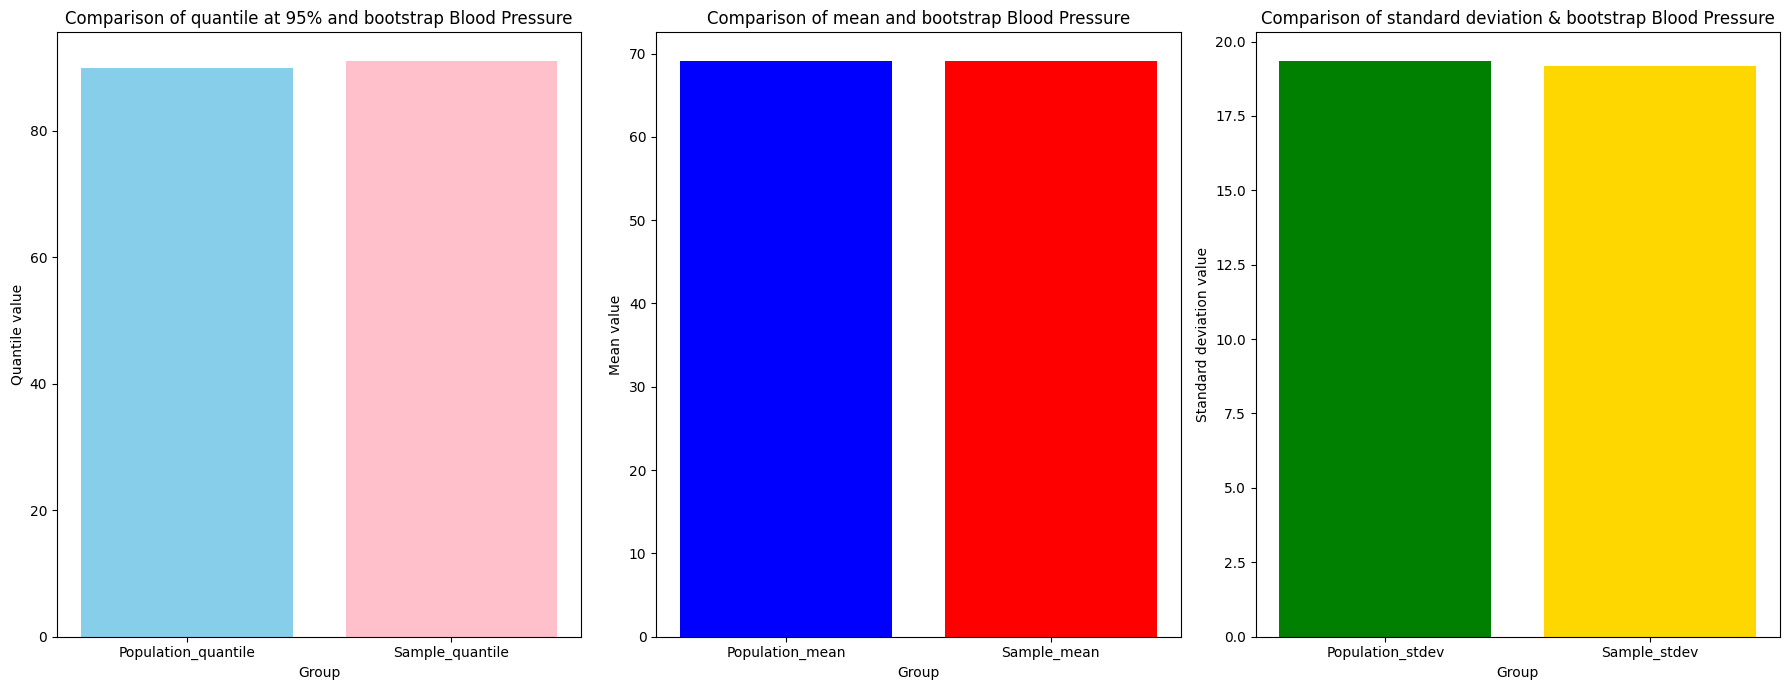

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

# The dataset
data = pd.read_csv("diabetes.csv")

# Setting seed
np.random.seed(5432)

# Number of samples to be created
num_samples = 500

# Number of observations considered
sample_size = 150

# Function to calculate mean, standard deviation, and percentile of sample
def bootstrap_statistic(data):
    boot_means = []
    boot_stdevs = []
    boot_quants = []
    for _ in range(num_samples):
        sample = resample(data, n_samples=sample_size)
        boot_mean = np.mean(sample)
        boot_stdev = np.std(sample)
        boot_quant = np.percentile(sample, 95)
        boot_means.append(boot_mean)
        boot_stdevs.append(boot_stdev)
        boot_quants.append(boot_quant)
    return np.mean(boot_means), np.mean(boot_stdevs), np.mean(boot_quants)

# Calculating bootstrap statistic values of the sample
boot_mean, boot_stdev, boot_quant = bootstrap_statistic(data['BloodPressure'])

# Calculating bootstrap statistic values of the population
mean_of_BPpop = np.mean(data['BloodPressure'])
sd_of_BPpop = np.std(data['BloodPressure'])
quan_of_BPpop = np.percentile(data['BloodPressure'], 95)

# Creating comparison dictionaries
quan_compare1 = {'Population_quantile': quan_of_BPpop, 'Sample_quantile': boot_quant}
mean_compare = {'Population_mean': mean_of_BPpop, 'Sample_mean': boot_mean}
stdev_compare = {'Population_stdev': sd_of_BPpop, 'Sample_stdev': boot_stdev}

# Plotting bar plots to compare
plt.figure(figsize=(18, 7))

plt.subplot(1, 3, 1)
plt.bar(quan_compare1.keys(), quan_compare1.values(), color=['skyblue', 'pink'])
plt.title("Comparison of quantile at 95% and bootstrap Blood Pressure")
plt.xlabel("Group")
plt.ylabel("Quantile value")

plt.subplot(1, 3, 2)
plt.bar(mean_compare.keys(), mean_compare.values(), color=['blue', 'red'])
plt.title("Comparison of mean and bootstrap Blood Pressure")
plt.xlabel("Group")
plt.ylabel("Mean value")

plt.subplot(1, 3, 3)
plt.bar(stdev_compare.keys(), stdev_compare.values(), color=['green', 'gold'])
plt.title("Comparison of standard deviation & bootstrap Blood Pressure")
plt.xlabel("Group")
plt.ylabel("Standard deviation value")

plt.tight_layout()
plt.show()
